In [1]:
import tushare as ts
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import time

In [2]:
ts.set_token('f1e99e550b4835593615bc080fcd1fe08ed3019e51b613ce7aceabae')
pro = ts.pro_api()
pro = ts.pro_api('f1e99e550b4835593615bc080fcd1fe08ed3019e51b613ce7aceabae')

In [3]:
df = pro.daily(ts_code='600919.SH', start_date='20090618', end_date='20190618')
date = pd.to_datetime(df['trade_date'])

In [4]:
def count_up_down(target_df,cnt_list=[]):
    for i in range(len(df)):
        if float(target_df['close'][i])<float(target_df['open'][i]):
            cnt_list.append(-1)
        else:
            cnt_list.append(1)  
    return cnt_list

In [5]:
tmp = []
cnt_res =  count_up_down(df,tmp)

In [6]:
week_list = []
for i in range(len(df)):
    week_list.append(date[i].weekday())

In [7]:
Monday_up = 0;
Tuesday_up=0
Wednesday_up=0
Thursday_up=0
Friday_up=0

for i in range(len(df)):
    if (0==week_list[i] and 1 == cnt_res[i]):
        Monday_up+=1
    elif (1==week_list[i] and 1 == cnt_res[i]):
        Tuesday_up+=1
    elif (2==week_list[i] and 1 == cnt_res[i]):
        Wednesday_up+=1
    elif (3==week_list[i] and 1 == cnt_res[i]):  
        Thursday_up+=1
    elif (4==week_list[i] and 1 == cnt_res[i]):  
        Friday_up+=1

In [8]:
def single_list(arr, target):
    return arr.count(target)

In [9]:
week_up = [Monday_up,Tuesday_up,Wednesday_up,Thursday_up,Friday_up]
percent_up =[]
for i in range(5):
    percent_up.append(week_up[i]/single_list(week_list,i))

In [10]:
week=['Monday','Tuesday','Wednesday','Thursday','Friday']#列表a
c={"percent" : percent_up,
   "week" : week}#将列表a，b转换成字典
data=pd.DataFrame(c)#将字典转换成为数据框
print(data)

    percent       week
0  0.548148     Monday
1  0.560284    Tuesday
2  0.447552  Wednesday
3  0.510638   Thursday
4  0.517986     Friday


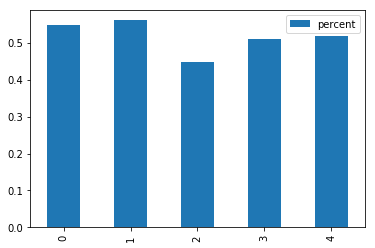

In [11]:
plt.figure()
data.plot(kind='bar')
plt.show()